<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/type1_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#prepare data
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


using modules: pandas, sklearn, matplotlib.pyplot


In [2]:
import os
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocess
import sklearn
import matplotlib.pyplot as plt
import random

In [3]:
PATH ='/gdrive/MyDrive/big_2021/data/official'
SEED = 49

In [4]:
random.seed(SEED)
np.random.seed(SEED)

In [5]:
type1_path = os.path.join(PATH, 'type1', 'mtcars.csv')

if os.path.isfile(type1_path):
    rawdata = pd.read_csv(type1_path)

else:
    print('wrong data file')

In [6]:
rawdata.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# EDA

data handling


In [7]:
modified_data = rawdata.copy()

In [8]:
#add
modified_data['dummy'] = [random.randint(1, 5) for x in range(modified_data.shape[0])]

#modify column name
modified_data.rename(columns = {'Unnamed: 0': 'Car_info'}, inplace = True)

#calculations
modified_data['dummy'] = modified_data['dummy'] * -1 / -1 + 1 - 1

#excetra
##조건 추출: 비교연산 가능
modified_data['isdummy_3'] = [True if x != 3 else False for x in modified_data['dummy']]
modified_data[modified_data['dummy'] == 3].head(2)

,Car_info,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,dummy,isdummy_3
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,3.0,False
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3.0,False


In [9]:
##sampling
#random_state: 스테이트 고정. 반복추출 시 사용 x
#가중치추출은 그냥 기본으로 수행(추출후 병합)
dummydata = modified_data[['gear', 'carb', 'isdummy_3']].copy()
dummydata.sample(n = None, frac = 0.3, random_state = SEED, replace = False)

,gear,carb,isdummy_3
30,5,8,True
2,4,1,True
15,3,4,True
7,4,2,True
9,4,4,False
26,5,2,True
27,5,2,False
28,5,4,False
16,3,4,True
29,5,6,False


In [10]:
#drop column
modified_data.drop(['dummy', 'isdummy_3'], axis = 1, inplace = True)

simple analysis

In [11]:
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car_info  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [12]:
modified_data.head()

,Car_info,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
modified_data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [14]:
modified_data['Car_info_dummy_0'] = [x.split(' ')[0] for x in modified_data['Car_info']]

modified_data['Car_info_dummy_0'].value_counts()    #normalize = True)

Merc        7
Toyota      2
Mazda       2
Fiat        2
Hornet      2
Cadillac    1
Chrysler    1
Pontiac     1
Valiant     1
Ferrari     1
Honda       1
Maserati    1
Camaro      1
AMC         1
Dodge       1
Datsun      1
Lotus       1
Volvo       1
Ford        1
Duster      1
Lincoln     1
Porsche     1
Name: Car_info_dummy_0, dtype: int64

handling outliers, missing values, etc

# scaling


Q: scale qsec column of mtcars.csv to minmax scale and count which is bigger than 0.5

various preprocessing method


In [15]:
#minmaxscaler, standardscaler, robustscaler, normalizer

In [16]:
#minmax
minmaxscaler = sklearn.preprocessing.MinMaxScaler()
modified_data['qsec_minmax'] = minmaxscaler.fit_transform(modified_data['qsec'].values.reshape(-1, 1))

In [17]:
#mean: 0, var: 1 (normal distribution)
stdscaler = sklearn.preprocessing.StandardScaler()
modified_data['qsec_stdscale'] = stdscaler.fit_transform(modified_data['qsec'].values.reshape(-1, 1))

In [18]:
#use median and quantile, robust to outliers
robustscaler = sklearn.preprocessing.RobustScaler()
modified_data['qsec_robust'] = robustscaler.fit_transform(modified_data['qsec'].values.reshape(-1, 1))

In [19]:
#modify datapoint vector by euclidian distance 1
m = modified_data[modified_data.columns[1:12]].values
norm = pd.DataFrame(sklearn.preprocessing.normalize(m, 'l2', axis = 1), columns = [x + '_norm' for x in modified_data.columns[1:12]])

results

In [20]:
norm.head(3)

,mpg_norm,cyl_norm,disp_norm,hp_norm,drat_norm,wt_norm,qsec_norm,vs_norm,am_norm,gear_norm,carb_norm
0,0.107022,0.030578,0.815404,0.560590,0.019875,0.013352,0.083885,0.000000,0.005096,0.020385,0.020385
1,0.106994,0.030570,0.815190,0.560443,0.019870,0.014648,0.086716,0.000000,0.005095,0.020380,0.020380
2,0.156464,0.027450,0.741146,0.638209,0.026420,0.015921,0.127711,0.006862,0.006862,0.027450,0.006862


In [21]:
modified_data[['qsec', 'qsec_minmax', 'qsec_stdscale', 'qsec_robust']].head(3)

,qsec,qsec_minmax,qsec_stdscale,qsec_robust
0,16.46,0.233333,-0.789601,-0.622665
1,17.02,0.300000,-0.471202,-0.343711
2,18.61,0.489286,0.432823,0.448319


In [22]:
print('bigger record number in qsec_minmax: ', modified_data[modified_data['qsec_minmax'] > 0.5].shape[0])

bigger record number in qsec_minmax:  9


#PCA

In [97]:
modified_data = rawdata.copy()

In [98]:
scaler = sklearn.preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(modified_data[modified_data.columns[1:]]), columns = modified_data.columns[1:])

In [99]:
x.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)
x = pd.DataFrame(x, columns = ['p1', 'p2'])
x['U'] = [x.split(' ')[0] for x in modified_data['Unnamed: 0']]


In [101]:
x['carname'] = modified_data['Unnamed: 0'].values

In [102]:
x

,p1,p2,U,carname
0,0.657213,1.735446,Mazda,Mazda RX4
1,0.629396,1.550033,Mazda,Mazda RX4 Wag
2,2.779397,-0.146457,Datsun,Datsun 710
3,0.311771,-2.363019,Hornet,Hornet 4 Drive
4,-1.974489,-0.754402,Hornet,Hornet Sportabout
5,0.056138,-2.786000,Valiant,Valiant
6,-3.002674,0.334887,Duster,Duster 360
7,2.055329,-1.465181,Merc,Merc 240D
8,2.287408,-1.983526,Merc,Merc 230
9,0.526381,-0.162013,Merc,Merc 280


Text(0, 0.5, '2nd primary component')

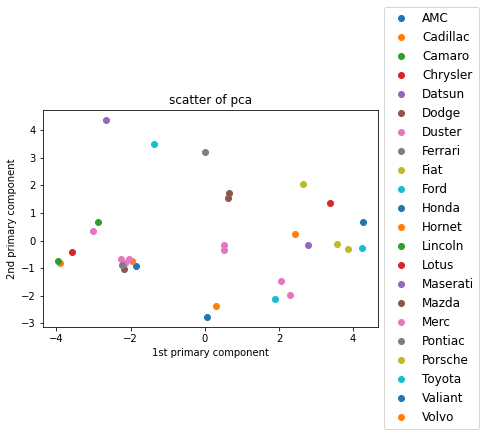

In [103]:
groups = x.groupby('U')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.p1, 
            group.p2, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, bbox_to_anchor=(1, 1.5)) # legend position

plt.title('scatter of pca')
plt.xlabel('1st primary component')
plt.ylabel('2nd primary component')

Text(0, 0.5, '2nd primary component')

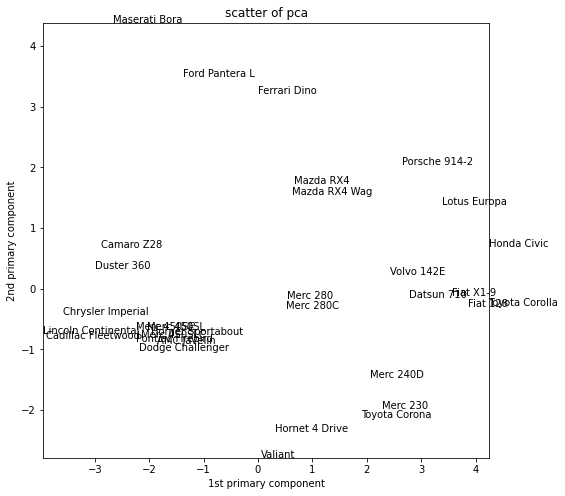

In [112]:
plt.figure(figsize = (8, 8))
plt.xlim(x['p1'].min(), x['p1'].max())
plt.ylim(x['p2'].min(), x['p2'].max())

for i in range(x.shape[0]):
    plt.text(x.iloc[i, 0], x.iloc[i, 1], x['carname'][i])
    
plt.title('scatter of pca')
plt.xlabel('1st primary component')
plt.ylabel('2nd primary component')

In [96]:
#차원 축소로 각 브랜드의 비슷한 차종끼리 군집된 것을 알 수 있다. 하지만 차종 정보는 확신할 수 없다

#변수간 연관 확인